In [2]:
library(tidyverse)
library(cowplot)
library(UpSetR)

Warning message:
“package ‘tidyverse’ was built under R version 4.2.2”
Warning message:
“package ‘ggplot2’ was built under R version 4.2.3”
Warning message:
“package ‘tibble’ was built under R version 4.2.3”
Warning message:
“package ‘tidyr’ was built under R version 4.2.2”
Warning message:
“package ‘readr’ was built under R version 4.2.2”
Warning message:
“package ‘purrr’ was built under R version 4.2.3”
Warning message:
“package ‘dplyr’ was built under R version 4.2.3”
Warning message:
“package ‘stringr’ was built under R version 4.2.3”
Warning message:
“package ‘forcats’ was built under R version 4.2.2”
Warning message:
“package ‘lubridate’ was built under R version 4.2.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ──────────────────────────────────────

# Check if peptides lists in peptides and PG reports are the same

In [3]:
metadata <- read.table("/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Metadata_CosyBio.tsv",
                       header = TRUE, sep = "\t", stringsAsFactors = FALSE)
                       
metadata <- metadata %>%
            mutate(Quantitative.column.name = gsub(" ", ".", Quantitative.column.name))

rownames(metadata) <- metadata$Quantitative.column.name
metadata <- metadata %>%
            mutate(Quantitative.column.name = gsub(".Pool", ".P_", gsub("Reporter.intensity.corrected.", "RIC_", Quantitative.column.name)))


# remove the outlier
metadata <- metadata %>%
            filter(Quantitative.column.name != "RIC_3.P_3")


# rename the columns - put the .P_[1-9]+ after dot before and the rest after (e.g. RIC_1.P_1 -> P_1.RIC_1)
metadata <- metadata %>%
            mutate(Quantitative.column.name = gsub("RIC_([0-9]+).P_([0-9]+)", "P_\\2.RIC_\\1", Quantitative.column.name))



head(metadata, 3)
dim(metadata)

,Quantitative.column.name,Pool,Reporter.ion,Patient,Group,Center
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Reporter.intensity.corrected.1.Pool1,P_1.RIC_1,Pool1,126,Common Reference,Common Reference,Center1
Reporter.intensity.corrected.2.Pool1,P_1.RIC_2,Pool1,127N,heathy1,heathy,Center1
Reporter.intensity.corrected.3.Pool1,P_1.RIC_3,Pool1,127C,FSGS1,FSGS,Center1


[1] 65  6

In [8]:
PG_report <- read.table(
    "/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Combined/proteinGroups.txt",
    header=T,
    sep="\t",
    stringsAsFactors = F)

dim(PG_report)

pg_intensities <- PG_report %>%
    select(c("Majority.protein.IDs", "Peptide.sequences", rownames(metadata)))
pg_intensities[pg_intensities==0] <- NA
dim(pg_intensities)
head(pg_intensities, 2)

[1] 768 288

[1] 768  67

,Majority.protein.IDs,Peptide.sequences,Reporter.intensity.corrected.1.Pool1,Reporter.intensity.corrected.2.Pool1,Reporter.intensity.corrected.3.Pool1,Reporter.intensity.corrected.4.Pool1,Reporter.intensity.corrected.5.Pool1,Reporter.intensity.corrected.6.Pool1,Reporter.intensity.corrected.7.Pool1,Reporter.intensity.corrected.8.Pool1,⋯,Reporter.intensity.corrected.2.Pool6,Reporter.intensity.corrected.3.Pool6,Reporter.intensity.corrected.4.Pool6,Reporter.intensity.corrected.5.Pool6,Reporter.intensity.corrected.6.Pool6,Reporter.intensity.corrected.7.Pool6,Reporter.intensity.corrected.8.Pool6,Reporter.intensity.corrected.9.Pool6,Reporter.intensity.corrected.10.Pool6,Reporter.intensity.corrected.11.Pool6
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,Q9UBX1;A0A7I2V4A8;A0A7I2V411;A0A7I2V3X1;A0A7I2V2K3;H0YD65;A0A7I2V5Q1;A0A7I2V3M3;A0A7I2V5B9;A0A024R5G9;A0A7I2V5F8;A0A7I2YQB3;A0A7I2V3E7;A0A7I2V3L9;A0A7I2YQW3;H0YE42;A0A7I2YQH8;A0A7I2V313;A0A7I2V3V9,GTAQYGVTK;SDVPFWAIK,NA,NA,NA,NA,NA,NA,NA,NA,⋯,29912,34282,25089,22957,25641,28272,24008,25484,27244,20172
2,A0A024R6N5;A0A0G2JRN3,AVLTIDEK;DTEEEDFHVDQATTVK;FLEDVKK;FLENEDR;FLENEDRR;FNKPFVFLMIEQNTK;GKWERPFEVK;GTEAAGAMFLEAIPMSIPPEVK;KLSSWVLLMK;KQINDYVEK;LGMFNIQHCK;LQHLENELTHDIITK;LSITGTYDLK;LSSWVLLMK;LVDKFLEDVK;LVDKFLEDVKK;LYHSEAFTVNFGDTEEAK;LYHSEAFTVNFGDTEEAKK;QINDYVEK;RLGMFNIQHCK;RSASLHLPK;SASLHLPK;SPLFMGK;SVLGQLGITK;TDTSHHDQDHPTFNK;TLNQPDSQLQLTTGNGLFLSEGLK;VFSNGADLSGVTEEAPLK;VFSNGADLSGVTEEAPLKLSK;VVNPTQK;WERPFEVK;WERPFEVKDTEEEDFHVDQATTVK,1473500,1115300,1125400,864250,1185900,930860,1215100,997710,⋯,105030000,15974000,36315000,18864000,24457000,18069000,27761000,196130000,17399000,16822000


In [9]:
peptides_df <- read.table("/home/yuliya/repos/cosybio/FedProt/data/TMT_data/raw_MaxQuant_reports/Combined/peptides.txt", 
    header=T,
    sep="\t",
    stringsAsFactors = F)
dim(peptides_df)

peptides_df <- peptides_df %>%
    select(c("Sequence", rownames(metadata)))

peptides_df[peptides_df==0] <- NA

dim(peptides_df)
head(peptides_df, 1)

[1] 8008  287

[1] 8008   66

,Sequence,Reporter.intensity.corrected.1.Pool1,Reporter.intensity.corrected.2.Pool1,Reporter.intensity.corrected.3.Pool1,Reporter.intensity.corrected.4.Pool1,Reporter.intensity.corrected.5.Pool1,Reporter.intensity.corrected.6.Pool1,Reporter.intensity.corrected.7.Pool1,Reporter.intensity.corrected.8.Pool1,Reporter.intensity.corrected.9.Pool1,⋯,Reporter.intensity.corrected.2.Pool6,Reporter.intensity.corrected.3.Pool6,Reporter.intensity.corrected.4.Pool6,Reporter.intensity.corrected.5.Pool6,Reporter.intensity.corrected.6.Pool6,Reporter.intensity.corrected.7.Pool6,Reporter.intensity.corrected.8.Pool6,Reporter.intensity.corrected.9.Pool6,Reporter.intensity.corrected.10.Pool6,Reporter.intensity.corrected.11.Pool6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,AAAATGTIFTFR,9932.8,10121,10191,4770.3,8109.8,12217,12637,7853.4,12351,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


### get sequences lists

In [10]:
pep_from_pg <- unique(unlist(strsplit(pg_intensities$Peptide.sequences, ";")))
length(pep_from_pg)

pep_from_pep <- unique(unlist(strsplit(peptides_df$Sequence, ";")))
length(pep_from_pep)

[1] 8006

[1] 8008

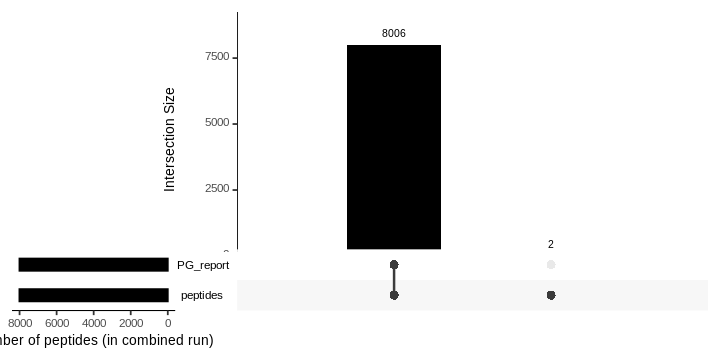

In [11]:
all_elements_comb <- unique(c(pep_from_pg, pep_from_pep))

data <- data.frame(element = all_elements_comb,
                   PG_report = as.integer(all_elements_comb %in% pep_from_pg),
                   peptides = as.integer(all_elements_comb %in% pep_from_pep))

options(repr.plot.width=6, repr.plot.height=3)
upset(data, sets = c("PG_report", "peptides"), order.by = "freq",
        # add title to the whole plot

        main.bar.color = "black",
        sets.bar.color = "black",
        sets.x.label = "Number of peptides (in combined run)",
        )

In [13]:
# print different peptides
sort(setdiff(pep_from_pg, pep_from_pep))
sort(setdiff(pep_from_pep, pep_from_pg))

character(0)

[1] "ACGLVASNLNLKPGECLR" "CDKEFMWALK"

In [15]:
peptides_df[peptides_df$Sequence %in% c('ACGLVASNLNLKPGECLR','CDKEFMWALK'),]

,Sequence,Reporter.intensity.corrected.1.Pool1,Reporter.intensity.corrected.2.Pool1,Reporter.intensity.corrected.3.Pool1,Reporter.intensity.corrected.4.Pool1,Reporter.intensity.corrected.5.Pool1,Reporter.intensity.corrected.6.Pool1,Reporter.intensity.corrected.7.Pool1,Reporter.intensity.corrected.8.Pool1,Reporter.intensity.corrected.9.Pool1,⋯,Reporter.intensity.corrected.2.Pool6,Reporter.intensity.corrected.3.Pool6,Reporter.intensity.corrected.4.Pool6,Reporter.intensity.corrected.5.Pool6,Reporter.intensity.corrected.6.Pool6,Reporter.intensity.corrected.7.Pool6,Reporter.intensity.corrected.8.Pool6,Reporter.intensity.corrected.9.Pool6,Reporter.intensity.corrected.10.Pool6,Reporter.intensity.corrected.11.Pool6
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
68,ACGLVASNLNLKPGECLR,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
744,CDKEFMWALK,NA,NA,NA,NA,NA,NA,NA,NA,NA,⋯,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
